In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv("/content/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
sns.set()
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<ipython-input-8-a46e4c889f69>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


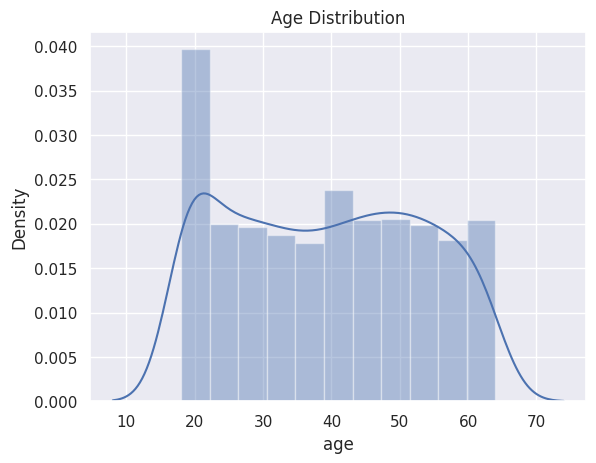

In [8]:
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

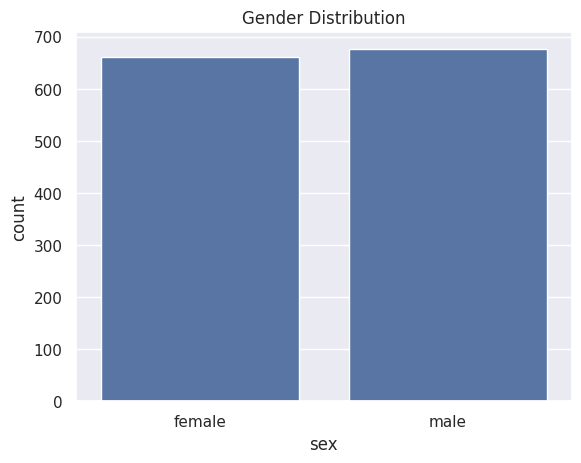

In [9]:
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

In [10]:
df.sex.value_counts()

,count
sex,
male,676
female,662


<ipython-input-11-17df316dada0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


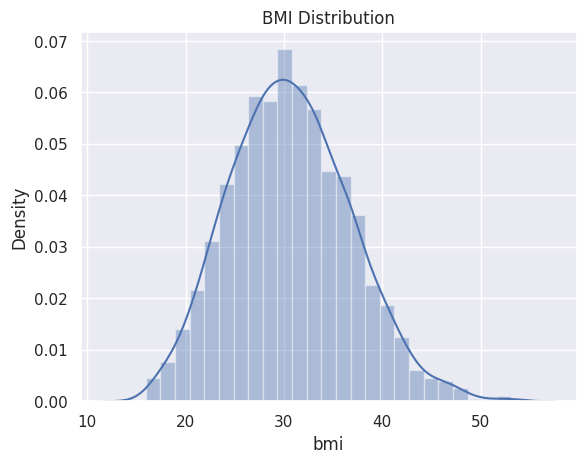

In [11]:
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

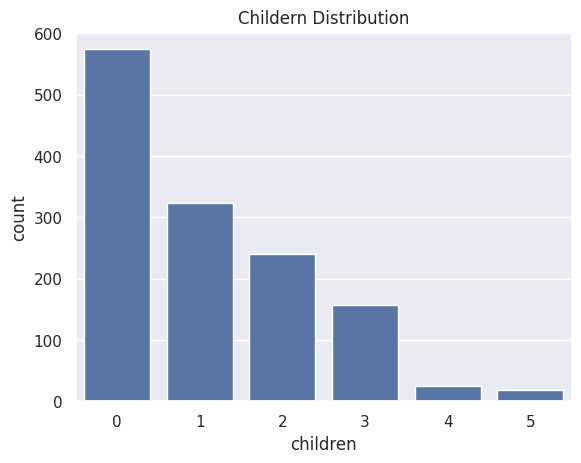

In [12]:
sns.countplot(x='children', data=df)
plt.title("Childern Distribution")
plt.show()

In [13]:
df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [14]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


**Data Pre-processing**

Encoding the categorical features.

In [16]:
df.replace({'sex':{'male':0, 'female':1}, 'smoker':{'yes':0, 'no':1}, "region":{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


**Splitting the Data**

In [18]:
X = df.drop(columns='charges')
y = df['charges']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Model Training**

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
r2_value =  metrics.r2_score(y_test, y_pred)

In [36]:
print("R Square Value is :", r2_value)

R Square Value is : 0.7950632588564914
